# Forcasting Assignment- Airlines Data

## Importing Libraries

In [56]:
# create a line plot
import pandas as pd
import numpy as np
from pandas import read_csv
from matplotlib import pyplot

In [57]:
## loading the data set.
df=pd.read_csv("AirlinesData.csv")

## Data Understanding

In [58]:
df.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [59]:
df.shape

(96, 2)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


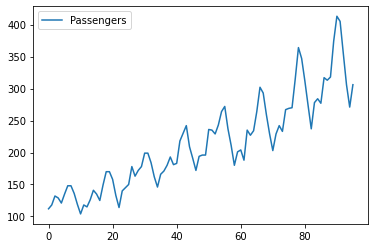

In [61]:
df.plot()
pyplot.show()

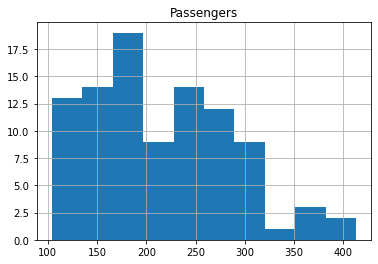

In [62]:
df.hist()
pyplot.show()

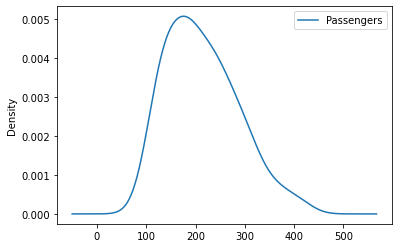

In [63]:
# create a density plot
df.plot(kind='kde')
pyplot.show()

In [64]:
from pandas import datetime

C:\Users\Admin\AppData\Local\Temp/ipykernel_15596/2431674481.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [65]:
df

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


## Converting a Month data into datetime format

In [66]:
df["Month"] = pd.to_datetime(df.Month,format="%b-%y")

In [67]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


## Extracting a month and year data separately

In [68]:
df["month"] = df.Month.dt.strftime("%b") # month extraction
df["year"] = df.Month.dt.strftime("%Y") # year extraction


In [69]:
df.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='month', ylabel='year'>

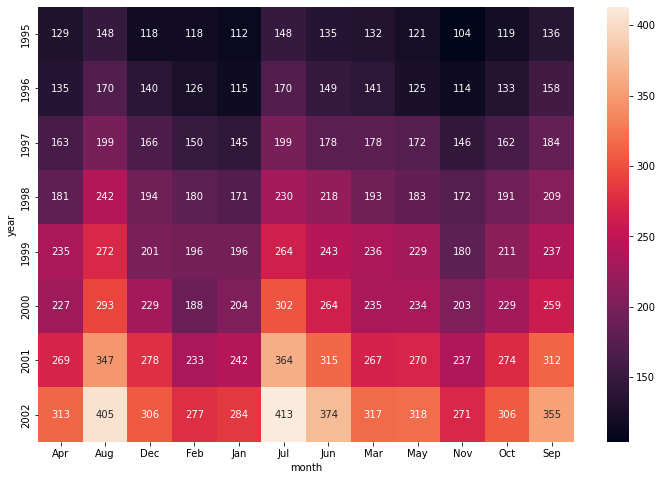

In [71]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='year', ylabel='Passengers'>

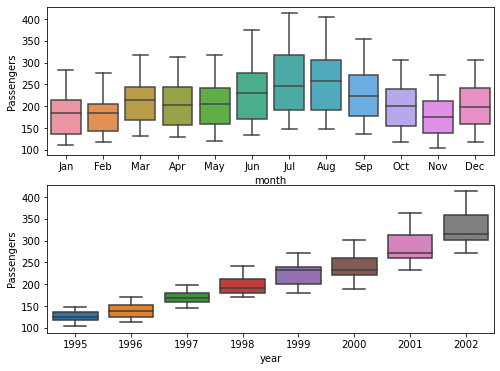

In [72]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=df)

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

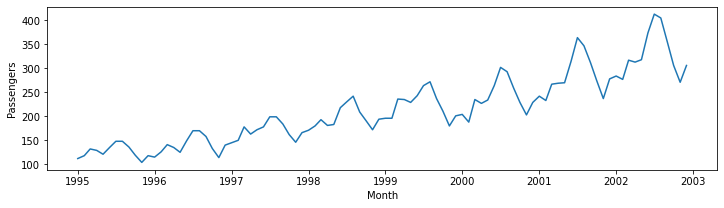

In [73]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Month",y="Passengers",data=df)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

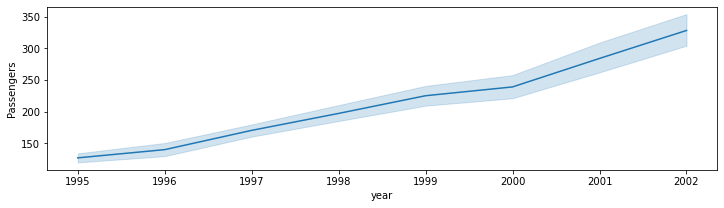

In [74]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=df)

## Lineplot infers that data is increasing and showing linear uptrend

In [95]:
df_1 = pd.get_dummies(df,columns=['month'])
df_1.head()

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [96]:
log_passeng=np.log(df_1['Passengers'])

In [97]:
log_passeng

0     4.718499
1     4.770685
2     4.882802
3     4.859812
4     4.795791
        ...   
91    6.003887
92    5.872118
93    5.723585
94    5.602119
95    5.723585
Name: Passengers, Length: 96, dtype: float64

In [98]:
df3 = pd.concat([log_passeng, df_1], join = 'outer', axis = 1)

In [99]:
df3.head()

,Passengers,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,4.718499,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,4.770685,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,4.882802,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,4.859812,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,4.795791,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [100]:
df_3 = df3.rename(columns = {df3.columns[0]: "log_passeng"})

In [101]:
df_3.head()

,log_passeng,Month,log_passeng,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,4.718499,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,4.770685,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,4.882802,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,4.859812,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,4.795791,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [106]:
column_names = df_3.columns.values
column_names[2]= "Passengers"
df_3.columns = column_names

In [107]:
df_3.head()

,log_passeng,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,4.718499,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,4.770685,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,4.882802,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,4.859812,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,4.795791,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0


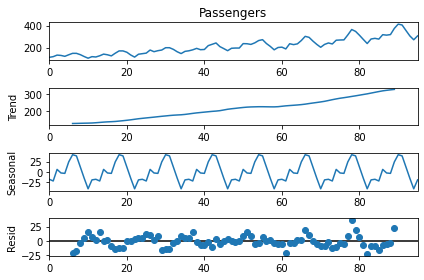

In [108]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df_3.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

## Spliting the data into train & test

In [110]:
Train = df_3.head(80)
Test = df_3.tail(16)

## Checking RMSE value for different model

In [116]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~year',data=df_3).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['year'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

42.076752785831744

In [118]:
##Multiplicative Seasonality

Mul_sea = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data = df_3).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

7.308590467629264e+112

In [127]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_passeng~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+year',data = df_3).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

7.978187027119136

In [128]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+year',data=df_3).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','year']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

17.499324143695123

In [129]:
#Result table

data = {"MODEL":pd.Series(["rmse_linear","rmse_Mult_sea","rmse_Mult_add_sea ","rmse_add_sea_quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Mult_sea,rmse_Mult_add_sea,rmse_add_sea_quad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_Mult_add_sea,7.978187e+00
3,rmse_add_sea_quad,1.749932e+01
0,rmse_linear,4.207675e+01
1,rmse_Mult_sea,7.308590e+112


## Multiplicative additive seasonality has lowest RMSE value so we will build model by using that

In [130]:
#Build the model on entire data set
model = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov+year',data=df_3).fit()

In [133]:
y_pred=model.predict(Test)
print(y_pred)

80    301.541667
81    273.416667
82    248.666667
83    274.291667
84    298.166667
85    298.041667
86    326.916667
87    321.041667
88    321.041667
89    349.041667
90    375.791667
91    374.041667
92    345.791667
93    317.666667
94    292.916667
95    318.541667
dtype: float64


## ACF and PACF plot

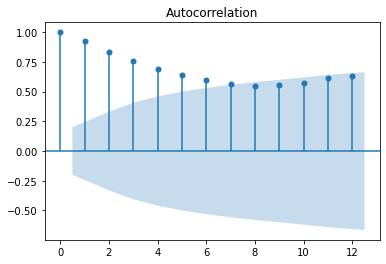

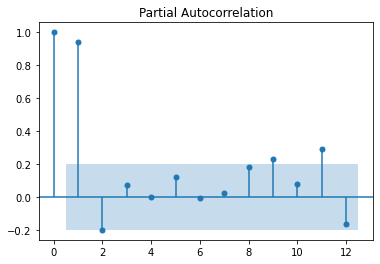

In [134]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df_3.Passengers,lags=12)
tsa_plots.plot_pacf(df_3.Passengers,lags=12)
plt.show()

In [135]:
##Evaluation matrics
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [136]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [137]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


11.375850554268094

## Holt method 

In [138]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

C:\Users\Admin\AppData\Local\Temp/ipykernel_15596/2579047746.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


51.934439843631175

## Holts winter exponential smoothing with additive seasonality and additive trend

In [139]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

7.608762162918885

## Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [140]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

3.217501582184734

## Holts winter exponential smoothing with multiplicative seasonality and additive trend is giving less MAPE value. Hence we will use this for model building

In [142]:
hwe_model_mul_add = ExponentialSmoothing(df_3["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [143]:
## Predicting next 10 forecast
hwe_model_mul_add.forecast(10)

96     312.899483
97     308.172137
98     355.532626
99     345.771258
100    345.697121
101    392.471492
102    436.502350
103    429.860359
104    380.174318
105    332.318757
dtype: float64

## ARIMA Model

In [144]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [145]:
df_3.head()

,log_passeng,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,4.718499,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,4.770685,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,4.882802,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,4.859812,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,4.795791,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [147]:
df_4=df_3.drop(['Month','log_passeng','month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul',"month_Jun",
             'month_Mar','month_May','month_Nov','month_Oct','month_Sep','year'],axis=1)

In [148]:
df_4

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
91,405
92,355
93,306
94,271


In [151]:
# separate out a validation dataset
split_point = len(df_4) - 10
dataset, validation = df_4[0:split_point], df_4[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


In [152]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values

In [153]:
X

array([[118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
       [229],
      

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


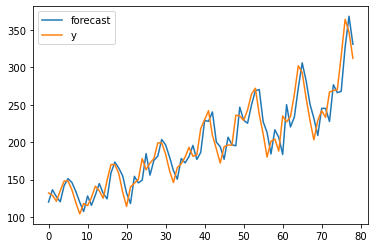

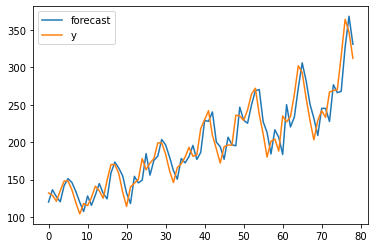

In [154]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [155]:
#Error on the test data
from math import sqrt
from sklearn.metrics import mean_squared_error
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

71.93697650540321

In [156]:
forecast

array([271.54444395, 272.96718349, 277.13674722, 280.43797127,
       282.2267577 , 283.52405734, 285.09893437, 287.0043271 ,
       288.98788907, 290.89407403])